In [ ]:
using JuMP
using Gurobi
using CSV
using DataFrames
using Plots

In [4]:
N = 4356
Tx = CSV.read("real_distances/drop_distance_matrix.csv", DataFrame, drop=1:1)[1:N, 1:N] |> Matrix #N, N
Ty = CSV.read("real_distances/distance_matrix_store_to_drop.csv",DataFrame, drop=1:1)[:, 1:N] |> Matrix; #M, N
Tz = CSV.read("real_distances/drop_to_store_distance_matrix.csv",DataFrame, drop=1:1)[1:N, :] |> Matrix; #N, M

function filter_distance_matrix(matrix, threshold)
    M, N = size(matrix)
    filtered_edges = Dict()  # Initialize an empty dictionary

    for i in 1:M
        for j in 1:N
            if matrix[i, j] <= threshold
                # Store the distance value with the key as the (i, j) tuple
                filtered_edges[(i, j)] = matrix[i, j]
            end
        end
    end

    return filtered_edges
end

filter_distance_matrix (generic function with 1 method)

In [14]:
x = []
y = [] 
z = []
for d in range(.5, step=0.5, length=50)
    println(d)
    filtered_Tx = filter_distance_matrix(Tx, d)
    filtered_Ty = filter_distance_matrix(Ty, d)
    filtered_Tz = filter_distance_matrix(Tz, d)
    push!(x, length(keys(filtered_Tx)))
    push!(y, length(keys(filtered_Ty)))
    push!(z, length(keys(filtered_Tz)))

end

0.51.01.52.02.53.03.54.04.55.05.56.06.57.07.58.08.59.09.510.010.511.011.512.012.513.013.514.014.515.015.516.016.517.017.518.018.519.019.520.020.521.021.522.022.523.023.524.024.525.0

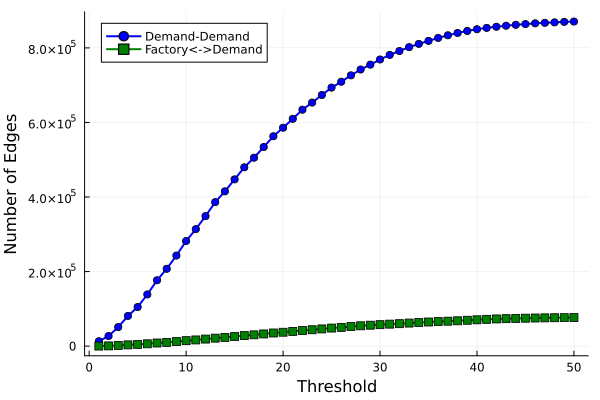

In [27]:
plot(x, label="Demand-Demand", lw=2, marker=:circle, color=:blue)
plot!(y, label="Factory<->Demand", lw=2, marker=:square, color=:green)
ylabel!("Number of Edges")
xlabel!("Threshold")
savefig("counts.png")
plot!()

